## 1. Loading the NIPS papers
<p>Every year, the NIPS conference releases a plethora of research papers. For our dataset, we harvested and analyzed over 50,000 PDF files, extracting valuable insights into diverse machine learning methodologies. This treasure trove of knowledge from NIPS conferences spanning three decades, from 1987 to 2017, resides in <code>datasets/papers.csv</code>. Within this CSV file lies a compendium of NIPS papers covering an extensive array of machine learning subjects, ranging from neural networks to optimization strategies and beyond.

<img src="https://assets.datacamp.com/production/project_158/img/nips_logo.png" alt="The logo of NIPS (Neural Information Processing Systems)"></p>
<p>To commence, our initial step involves delving into the CSV file to discern the nature of the data available for analysis and its organizational framework. Typically, a research paper comprises a title, an abstract, and the body of the text. Ancillary data such as figures and tables remain unextracted from the PDF documents. Each paper encapsulates a fresh technique or advancement. Our analytical endeavor zeroes in on scrutinizing these papers utilizing natural language processing techniques.</p>

In [1]:
# Importing modules
import pandas as pd

# Read datasets/papers.csv into papers
papers = pd.read_csv('datasets/papers.csv')

# Print out the first rows of papers
papers.head()

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


## 2. Preparing the data for analysis
In our scrutiny of the papers, our sole focus lies on the textual content linked with each paper, alongside the publication year. Employing natural language processing techniques, we delve into this textual data. Given that the file encompasses certain metadata like IDs and filenames, it becomes imperative to eliminate any columns devoid of pertinent textual information.

In [2]:
# Remove the columns
papers = papers.drop(columns=['id','event_type','pdf_name'])

# Print out the first rows of papers
papers.head()

,year,title,abstract,paper_text
0,1987,Self-Organization of Associative Database and ...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,1987,A Mean Field Theory of Layer IV of Visual Cort...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,1988,Storing Covariance by the Associative Long-Ter...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1994,Bayesian Query Construction for Neural Network...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1994,"Neural Network Ensembles, Cross Validation, an...",Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


## 3. Plotting how machine learning has evolved over time
To grasp the recent surge in popularity within the realm of machine learning, our initial step entails visualizing the annual publication counts. Examining the volume of papers released each year offers insight into the magnitude of the machine learning 'revolution.' This remarkable uptick in popularity is commonly linked to substantial advancements in compute power, data availability, and algorithmic enhancements.

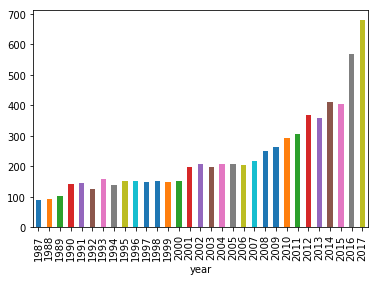

In [4]:
# Group the papers by year
groups = papers.groupby('year')

# Determine the size of each group
counts = groups.size()

# Visualise the counts as a bar plot
import matplotlib.pyplot as plt
%matplotlib inline
counts.plot(kind='bar')

## 4. Preprocessing the text data
Now, let's delve into scrutinizing the titles of various papers to discern prevailing trends in machine learning. Initially, we'll undertake some basic preprocessing steps on the titles to enhance their suitability for analysis. Employing a regular expression, we'll eliminate any punctuation from the titles. Subsequently, we'll convert them to lowercase. Finally, we'll display the titles of the initial rows before and after implementing these modifications.

In [5]:
# Load the regular expression library
import re

# Print the titles of the first rows 
print(papers['title'].head())

# Remove punctuation
papers['title_processed'] = papers['title'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
papers['title_processed'] = papers['title_processed'].map(lambda x:x.lower())

# Print the processed titles of the first rows 
papers['title_processed'].head()

0    Self-Organization of Associative Database and ...
1    A Mean Field Theory of Layer IV of Visual Cort...
2    Storing Covariance by the Associative Long-Ter...
3    Bayesian Query Construction for Neural Network...
4    Neural Network Ensembles, Cross Validation, an...
Name: title, dtype: object


0    self-organization of associative database and ...
1    a mean field theory of layer iv of visual cort...
2    storing covariance by the associative long-ter...
3    bayesian query construction for neural network...
4    neural network ensembles cross validation and ...
Name: title_processed, dtype: object

## 5.  A word cloud to visualize the preprocessed text data
To confirm the accuracy of our preprocessing, we can generate a word cloud based on the titles of the research papers. This graphical representation offers insights into the most prevalent words, aiding our comprehension of whether we're proceeding in the correct direction. Moreover, it facilitates the identification of any potential need for additional preprocessing steps before delving deeper into text analysis.

Given Python's extensive repository of open libraries, we'll leverage Andreas Mueller's wordcloud library rather than devising our own method for creating word clouds. You can find the library [here](http://amueller.github.io/word_cloud/).

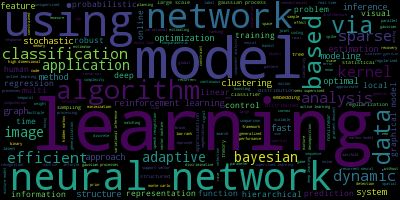

In [7]:
# Import the wordcloud library
import wordcloud

# Join the different processed titles together.
long_string = ' '.join(papers['title_processed'])

# Create a WordCloud object
wordcloud = wordcloud.WordCloud()

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

## 6.  Prepare the text for LDA analysis
Our primary method for text analysis is latent Dirichlet allocation (LDA). This technique excels at detecting topics within extensive document collections, unveiling the predominant themes present in large, unlabeled sets of texts. Each 'topic' represents a cluster of words frequently found together. The premise is that LDA can elucidate the distinct topics encapsulated within research titles, serving as a springboard for further investigation.

However, LDA doesn't directly process text data. Initially, we must convert the documents into a straightforward vector representation. This representation will serve as input for LDA to discern topics. Each element of a 'document vector' corresponds to the frequency of a word within the document. Consequently, we'll transform a list of titles into a list of vectors, each with a length equivalent to the vocabulary size. For instance, 'Analyzing machine learning trends with neural networks.' would be represented as [1, 0, 1, ..., 1, 0].

Subsequently, we'll visualize the ten most common words derived from this process (the list of document vectors). It's worth noting that these words should also be prevalent in the word cloud, providing a cross-validation of our analysis.

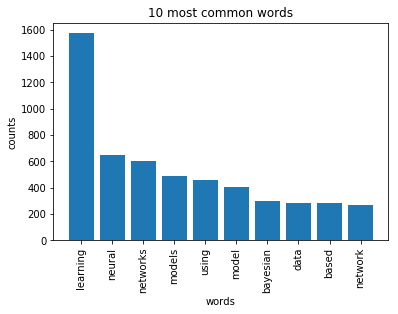

In [8]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 

    plt.bar(x_pos, counts,align='center')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.title('10 most common words')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(papers['title_processed'])

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

## 7. Analysing trends with LDA
Lastly, the research titles will undergo analysis utilizing LDA. It's important to note that if we were to process a new set of documents, such as news articles, a similar preprocessing workflow would be necessary. This modular approach allows for seamless adaptation of the constructed flow to different text datasets.

The only parameter we'll adjust is the number of topics within the LDA algorithm. Typically, practitioners gauge the model's performance using the 'perplexity' metric, tweaking the number of topics until achieving the lowest 'perplexity' score. However, for now, let's experiment with varying numbers of topics. This exploration will enable us to delineate the underlying themes such as 'neural networks,' 'reinforcement learning,' 'kernel methods,' 'Gaussian processes,' and so forth.

In [ ]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below (use int values below 15)
number_topics = 10
number_words = 12

# Create and fit the LDA model
lda = LDA(n_components=number_topics)
lda.fit(count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)